In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import torch
from matplotlib import pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [25]:
from common import Gaussian, GaussianMixture, contour_density, imshow_density

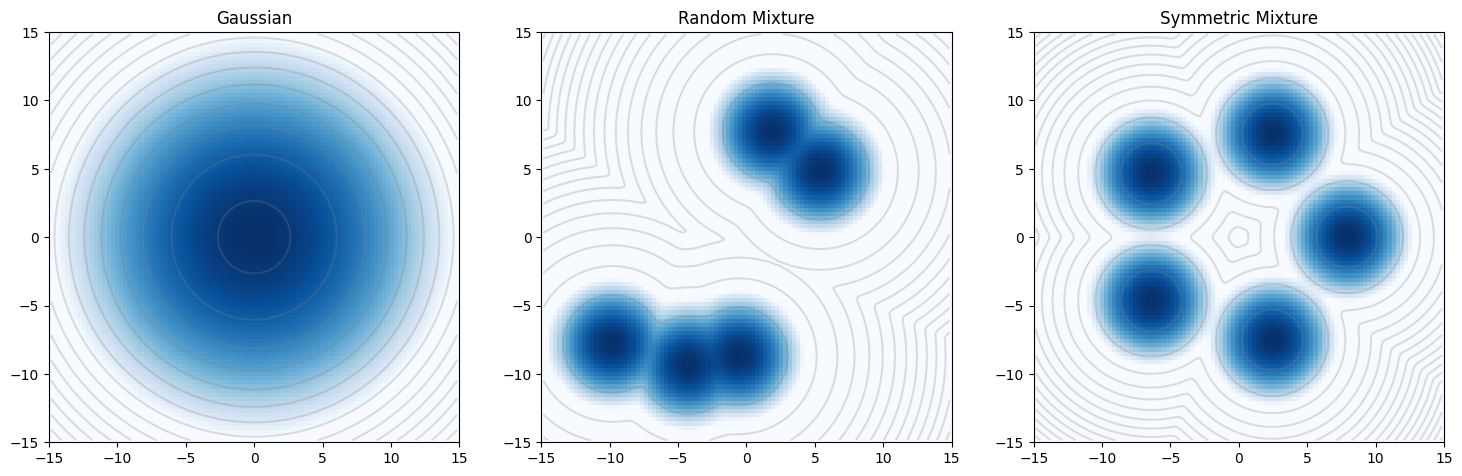

In [26]:
# Visualize densities

densities = {
    "Gaussian": Gaussian(mean=torch.zeros(2), cov=10 * torch.eye(2)).to(device),
    "Random Mixture": GaussianMixture.random_2D(nmodes=5, std=1.0, scale=20.0, seed=3.0).to(device),
    "Symmetric Mixture": GaussianMixture.symmetric_2D(nmodes=5, std=1.0, scale=8.0).to(device),
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
bins = 100
scale = 15
for idx, (name, density) in enumerate(densities.items()):
    ax = axes[idx]
    ax.set_title(name)
    imshow_density(density, bins, scale, ax, vmin=-15, cmap=plt.get_cmap('Blues'))
    contour_density(density, bins, scale, ax, colors='grey', linestyles='solid', alpha=0.25, levels=20)
plt.show()

In [27]:
from common import EulerMaruyamaSimulator, LangevinSDE, graph_dynamics

100%|██████████| 999/999 [00:00<00:00, 1539.71it/s]


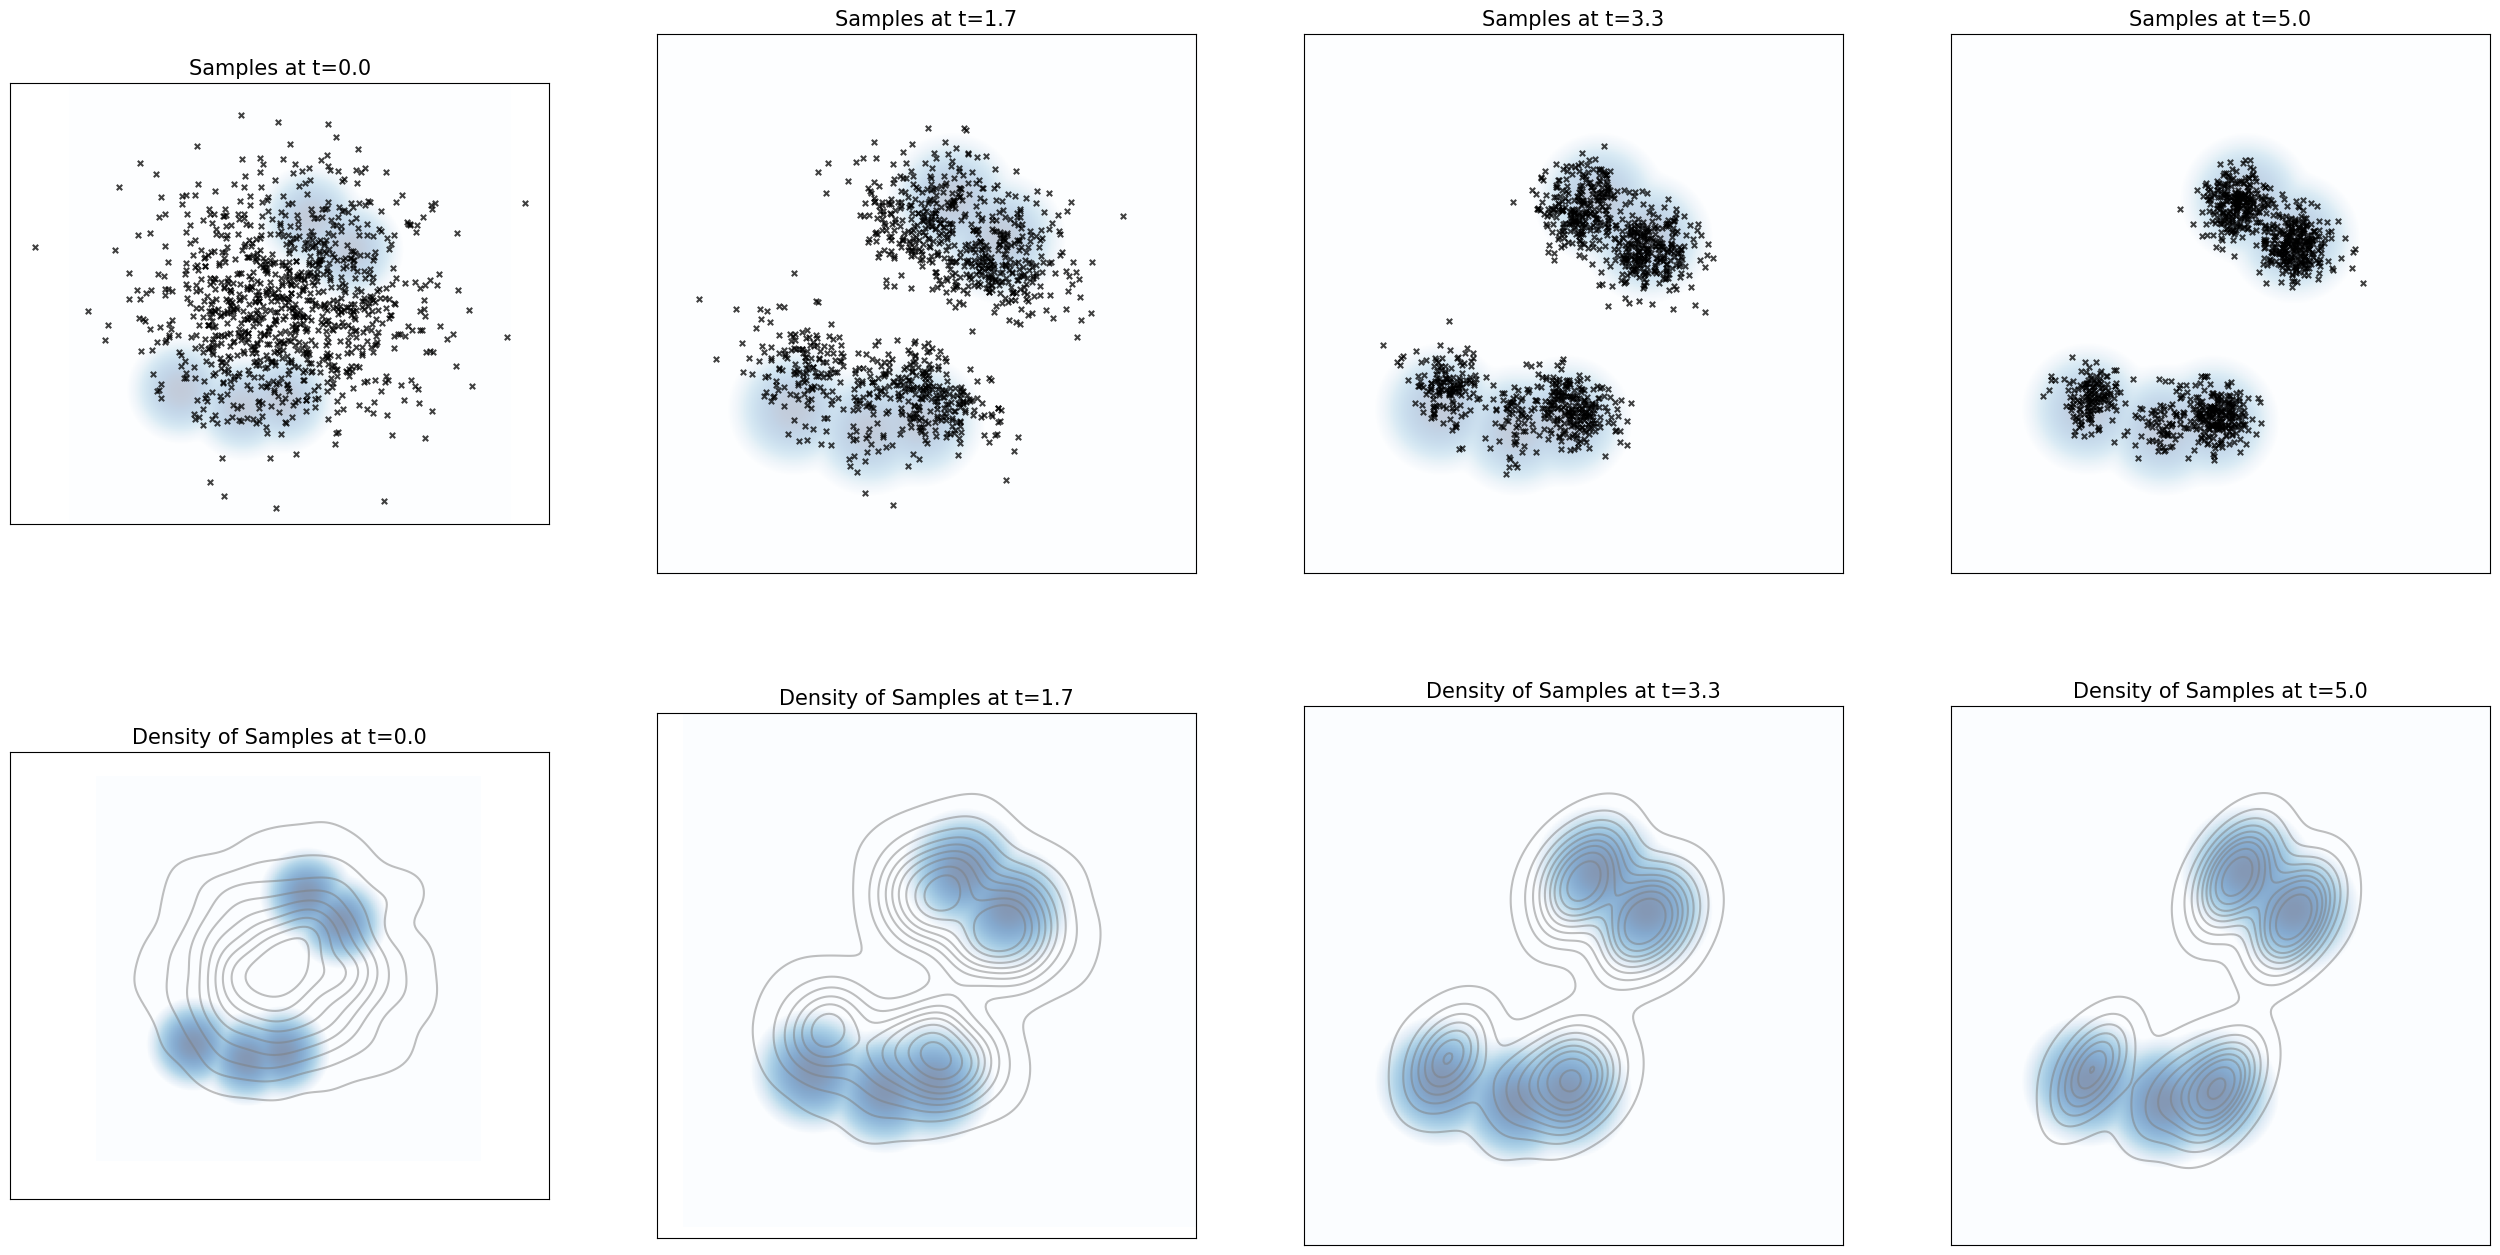

In [28]:
# Construct the simulator


target = GaussianMixture.random_2D(nmodes=5, std=0.75, scale=15.0, seed=3.0).to(device)
sde = LangevinSDE(sigma = 10.0, density = target)
simulator = EulerMaruyamaSimulator(sde)

# Graph the results!
graph_dynamics(
    num_samples = 1000,
    source_distribution = Gaussian(mean=torch.zeros(2), cov=20 * torch.eye(2)).to(device),
    simulator=simulator,
    density=target,
    timesteps=torch.linspace(0,5.0,1000).to(device),
    plot_every=334,
    bins=200,
    scale=15
)  

In [29]:
from common import animate_dynamics

In [30]:
# OPTIONAL CELL
# Construct the simulator
target = GaussianMixture.random_2D(nmodes=5, std=0.75, scale=15.0, seed=3.0).to(device)
sde = LangevinSDE(sigma=10.0, density=target)
simulator = EulerMaruyamaSimulator(sde)

# Graph the results!
animate_dynamics(
    num_samples=1000,
    source_distribution=Gaussian(mean=torch.zeros(2), cov=20 * torch.eye(2)).to(device),
    simulator=simulator,
    density=target,
    timesteps=torch.linspace(0, 1.5, 1000).to(device),
    bins=200,
    scale=15,
    animate_every=100
)

100%|██████████| 999/999 [00:00<00:00, 1540.00it/s]
